In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os


# Any results you write to the current directory are saved as output

In [4]:
"""memasukan dataset harga bawang yang berbentuk excel ke dalam jupiter nootbook"""
data_df = pd.read_csv('data/timeseries-KTG-wonosobo.csv')

In [5]:
data_df = data_df[['tanggal','harga']]
data_df

,tanggal,harga
0,2021-01-01,9000.0
1,2021-01-02,9000.0
2,2021-01-03,9000.0
3,2021-01-04,9000.0
4,2021-01-05,9000.0
...,...,...
1035,2023-11-16,11000.0
1036,2023-11-17,11000.0
1037,2023-11-18,11000.0
1038,2023-11-19,11000.0


In [22]:
#"""menghapus colom yang tidak diperlukan akan muncul kolom2 yang tidak disebutkan didalam code tersebut"""
#data_df = data_df.drop(columns=['id','Kab/Kota', 'Tingkat Harga', 'BMB', 'BPI', 'BPL', 'BNC', 'CMB','CMK', 'CRH', 'CRM', 
#                      'KBK', 'KTG', 'KLB', 'KLG', 'MTM', 'TMT', 'WRT', 'CHB',])

In [23]:
#data_df

In [24]:
con = data_df['tanggal']
data_df['Tanggal']=pd.to_datetime(data_df['tanggal'])
data_df.set_index('tanggal', inplace=True)
#check datatype of index
data_df.index

Index(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
       '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10',
       ...
       '2023-11-26', '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
       '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04', '2023-12-05'],
      dtype='object', name='tanggal', length=1055)

In [25]:
# Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title("BMK Price History")
#plt.plot(data_df['BMK'])
#plt.xlabel('Date', fontsize=18)
#plt.ylabel('BMK Price Rupiah (Rp)', fontsize=18)
#plt.show()

In [26]:
#data_df['tanggal'] = data_df.index
#data_df.head()

In [27]:
#data_df['tanggal'] = pd.to_datetime(data_df['tanggal'])

In [28]:
data_df.head()

,harga,Tanggal
tanggal,,
2021-01-01,9000.0,2021-01-01
2021-01-02,9000.0,2021-01-02
2021-01-03,9000.0,2021-01-03
2021-01-04,9000.0,2021-01-04
2021-01-05,9000.0,2021-01-05


In [29]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(data_df['harga'].values.reshape(-1, 1))

In [30]:
dataset[0:10]

array([[0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667],
       [0.16666667]])

In [31]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

738 317


In [32]:
#print(len(data_df))
#print(780 + 195)

In [33]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(722, 15)
(722,)
(301, 15)
(301,)


In [36]:
#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)

In [37]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [38]:
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))

#set loss fungsi dan optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50


722/722 - 11s - loss: 0.0042 - 11s/epoch - 16ms/step
Epoch 2/50
722/722 - 5s - loss: 0.0014 - 5s/epoch - 6ms/step
Epoch 3/50
722/722 - 5s - loss: 0.0012 - 5s/epoch - 6ms/step
Epoch 4/50
722/722 - 5s - loss: 0.0011 - 5s/epoch - 6ms/step
Epoch 5/50
722/722 - 5s - loss: 9.8529e-04 - 5s/epoch - 7ms/step
Epoch 6/50
722/722 - 5s - loss: 9.0546e-04 - 5s/epoch - 6ms/step
Epoch 7/50
722/722 - 5s - loss: 9.6674e-04 - 5s/epoch - 7ms/step
Epoch 8/50
722/722 - 7s - loss: 8.7336e-04 - 7s/epoch - 10ms/step
Epoch 9/50
722/722 - 6s - loss: 8.1596e-04 - 6s/epoch - 9ms/step
Epoch 10/50
722/722 - 5s - loss: 7.9675e-04 - 5s/epoch - 7ms/step
Epoch 11/50
722/722 - 1s - loss: 7.9799e-04 - 1s/epoch - 2ms/step
Epoch 12/50
722/722 - 1s - loss: 7.8835e-04 - 1s/epoch - 2ms/step
Epoch 13/50
722/722 - 1s - loss: 7.9023e-04 - 1s/epoch - 2ms/step
Epoch 14/50
722/722 - 1s - loss: 8.0402e-04 - 1s/epoch - 2ms/step
Epoch 15/50
722/722 - 2s - loss: 7.1765e-04 - 2s/epoch - 2ms/step
Epoch 16/50
722/722 - 1s - loss: 7.4624e-0

In [39]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

10/10 [==============================] - 0s 3ms/step
Train Score: 149.44 RMSE
Test Score: 321.54 RMSE


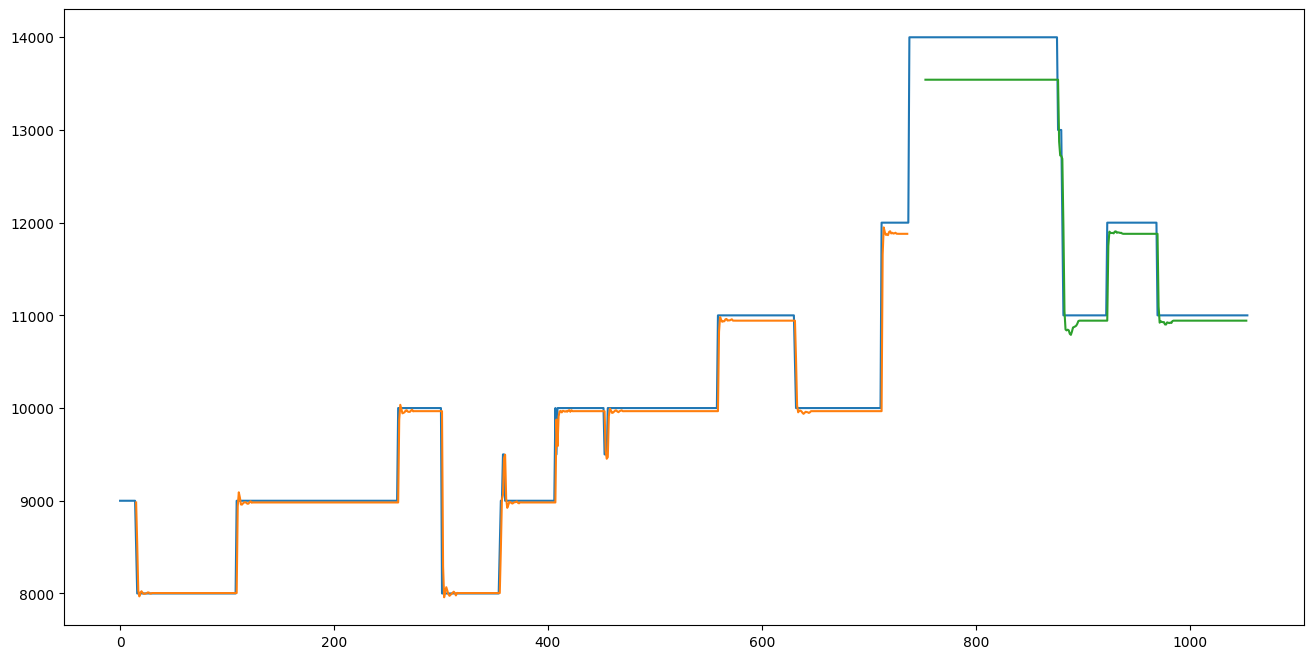

In [40]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

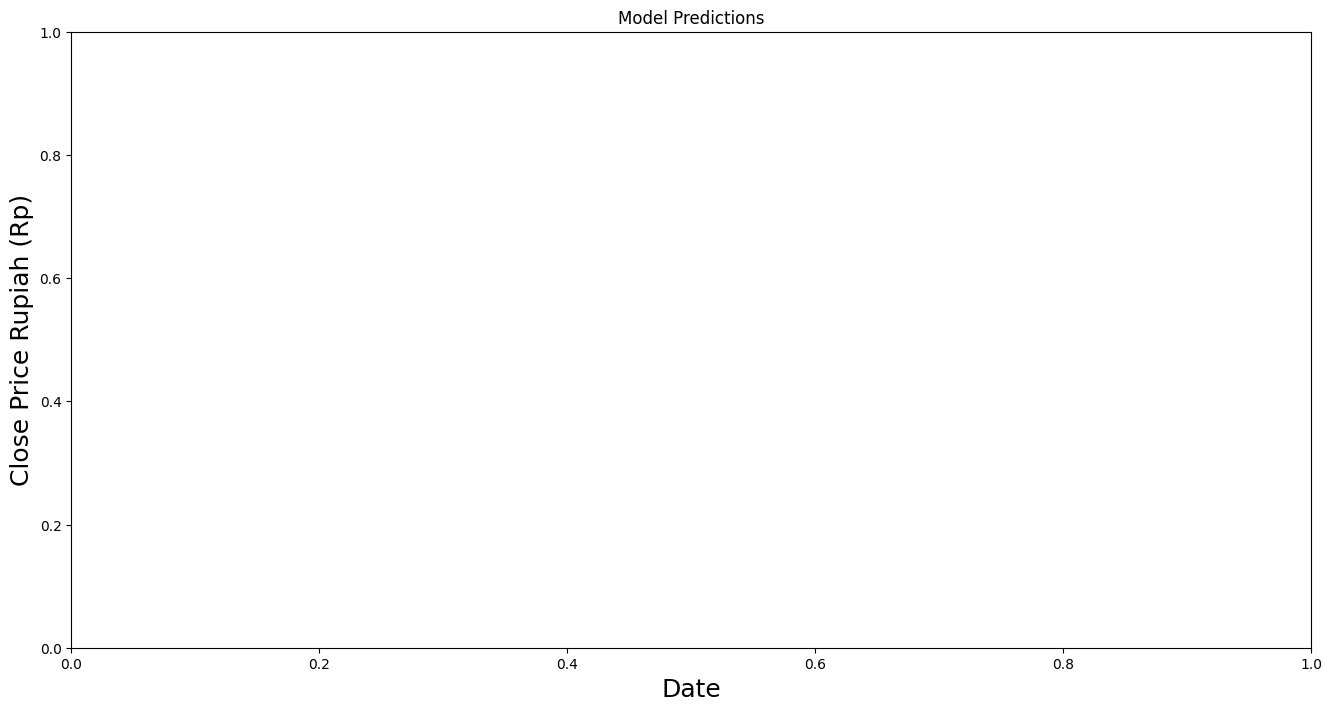

In [41]:
plt.figure(figsize=(16,8))
plt.title('Model Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupiah (Rp)', fontsize=18)
plt.plot(train['BMK'])
plt.plot(valid[['BMK', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()